In [2]:
import applications as app
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch

noise_std = 0.75
patch_size = 7
alpha = float('inf')
downscale_ratio = 0.75
num_levels = 9
device = "cuda"

In [94]:
def alpha_tile(image: torch.Tensor) -> torch.Tensor:
    _, h, w = image.shape
    std = 10

    left_strip = image[:, :, 0].unsqueeze(-1)
    assert left_strip.shape == (3, h, 1), left_strip.shape
    left_smear = left_strip.repeat(1, 1, w)
    assert left_smear.shape == (3, h, w), left_smear.shape
    left_mask = torch.linspace(0, w, w)
    assert left_mask.shape == (w,)
    left_mask = torch.exp(-((left_mask - w) ** 2) / (2 * std ** 2))
    left_mask = left_mask.unsqueeze(0).unsqueeze(0).repeat(3, h, 1)
    left_image = left_smear * left_mask + image * (1 - left_mask)
    
    top_strip = image[:, 0, :].unsqueeze(1)
    assert top_strip.shape == (3, 1, w), top_strip.shape
    top_smear = top_strip.repeat(1, h, 1)
    assert top_smear.shape == (3, h, w), top_smear.shape
    top_mask = torch.linspace(0, h, h)
    top_mask = torch.exp(-((top_mask - h) ** 2) / (2 * std ** 2))
    assert top_mask.shape == (h,)
    top_mask = top_mask.unsqueeze(0).unsqueeze(-1).repeat(3, 1, w)

    return top_smear * top_mask + left_image * (1 - top_mask)

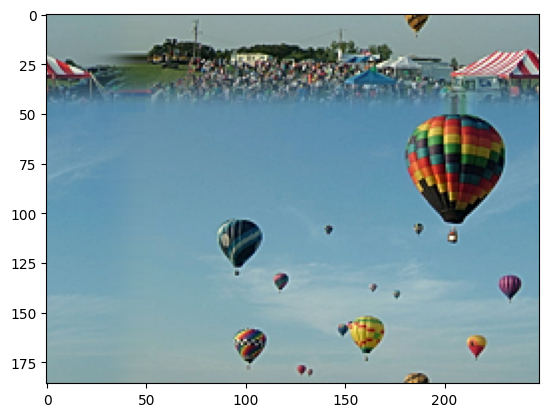

In [95]:
image = utils.imread("data/generation/balloons.png")
# utils.imshow(image)
w = image.shape[2]
h = image.shape[1]

tile = alpha_tile(image)
utils.imshow(torch.roll(tile, shifts=(50, 50), dims=(1, 2)))

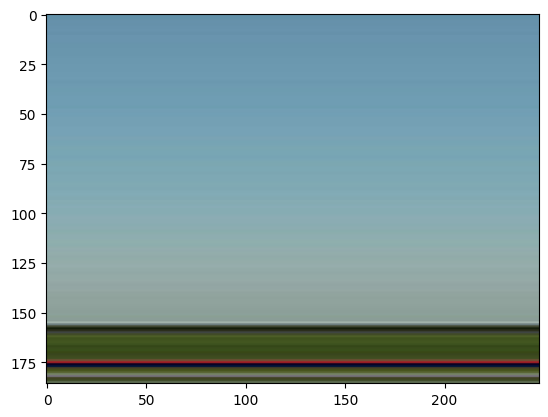

In [18]:
strip = image[:, :, 0].unsqueeze(-1)
smear = strip.repeat(1, 1, 248)
utils.imshow(smear)

In [28]:
mask = torch.linspace(0, w, w)

mean = w  # Mean of the Gaussian
std = 10   # Standard deviation

# Apply Gaussian function
mask = torch.exp(-((mask - mean) ** 2) / (2 * std ** 2))
mask = mask.unsqueeze(0).unsqueeze(0).repeat(3, h, 1)
mask.shape

torch.Size([3, 186, 248])

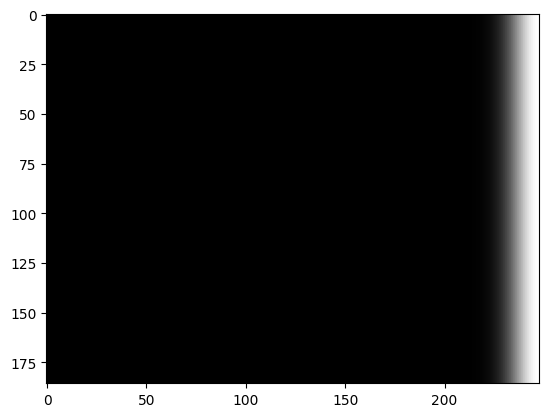

In [29]:
utils.imshow(mask)

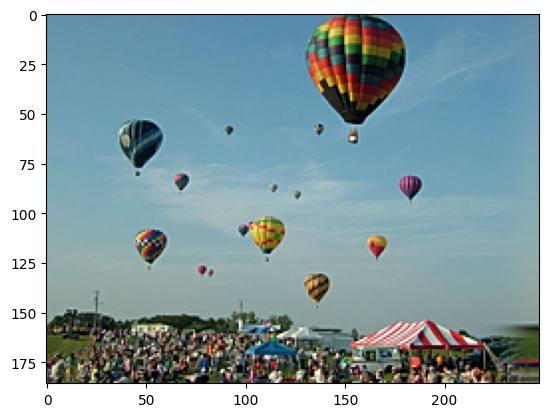

In [36]:
image2 = smear * mask + image * (1 - mask) 
utils.imshow(image2)

RuntimeError: The size of tensor a (248) must match the size of tensor b (46128) at non-singleton dimension 2